Plotting wind vectors measured by satellite on top of a true color image.

In [1]:
import sys
sys.path.insert(0, '..')
import datetime
import re
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from filament import filament
import logging
import cmocean
import copy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from importlib import reload
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Starting")

INFO:root:Starting


## Input parameters
We set the date of interest and the domain coordinates are taken from the geoTIFF file.

In [3]:
year, month, day = 2017, 9, 4
figdir = "../figures/wind/Canary/"
visibledir = "/data/Visible/Canarias//"
satellite = "VIIRS"
satellite = "TERRA"
#satellite = "AQUA"
#satellite = "NOAA"
#satellite = "Sentinel-2"
os.path.isdir(visibledir)
if not(os.path.exists(figdir)):
    os.mkdir(figdir)

## Data

In [4]:
datewind = datetime.datetime(year, month, day)
dayofyear = datewind.timetuple().tm_yday

### Visible image

In [9]:
visibleim = datewind.strftime("{}-%Y-%m-%dT00_00_00Z.tiff".format(satellite))
#visibleim = datewind.strftime("Sentinel-3_OLCI_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("Sentinel-2-L1C_%Y-%m-%d.tiff")
#visibleim = datewind.strftime("AQUA-%Y-%m-%dT00_00_00Z.tiff")

vis = filament.Visible()
if os.path.exists(os.path.join(visibledir, visibleim)):
    print("Reading geoTIFF file {}".format(visibleim))
    vis.read_geotiff(os.path.join(visibledir, visibleim))
    extent2 = copy.deepcopy(vis.extent)
    extent2[0] -= 360.
    extent2[1] -= 360.
else:
    logger.warning("No visible image, specify domain coordinates")
    vis.extent = (-19., -6., 25., 35.)

### Scatterometer wind
The wind (netCDF) are read from the JPL OPEnDAP server.      
The files are sorted by years and days of year.

With these pieces of information we can create a list of files URLs.

In [6]:
filelist1 = filament.get_filelist_url(year, dayofyear)

INFO:Filament:Found 28 files


In [ ]:
wind.compute_speed()

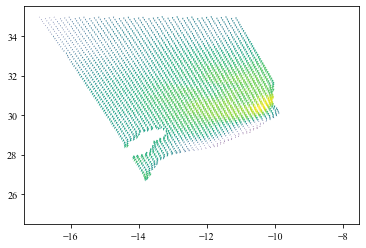

In [44]:
plt.quiver(wind.lon, wind.lat, wind.u, wind.v, wind.speed)
plt.show()

In [41]:
filelist2 = ["/data/Wind/ASCAT/GranCanaria/ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.l2.nc.gz"]

In [45]:
for ifile, dataurl in enumerate(filelist2):

    logger.info("Working on {}".format(dataurl))
    wind = filament.Wind()
    res = wind.read_ascat(dataurl, vis.extent)
    # res = wind.read_ascat(dataurl, extent2)
        
    if res:
        # filelistclean.append(dataurl)
        mm = str(month).zfill(2)
        dd = str(day).zfill(2)
        
        fname = "".join((satellite, "-", dataurl.split("/")[-1].split(".")[0], ".jpg"))
        logger.info("Saving figure as {}".format(fname))
        figname = os.path.join(figdir, fname)
        
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, projection=myproj)

        # vis.add_to_plot(ax, myproj)
        wind.add_to_plot(fig, ax, domain=vis.extent, cmap=plt.cm.hot_r,
                         clim=[5., 15.], vis=False, quivscale=500, quivwidth=0.001,
                         date=wind.time.strftime("%Y-%m-%d %H:%M:%S"),
                         )
        
        #filament.decorate_map(ax, [7.5, 10, 41.75, 43.5], 
        #                      np.arange(7., 10., .5), 
        #                      np.arange(40., 44., 0.25))
        
        
        plt.show()
        # plt.savefig(figname, dpi=300, bbox_inches="tight")
        # plt.close()
        fig.clf()
logger.info("Figures printed in {}".format(figdir))

INFO:root:Working on /data/Wind/ASCAT/GranCanaria/ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.l2.nc.gz
INFO:Filament:Subsetting data to region of interest
INFO:root:Saving figure as TERRA-ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.jpg


AssertionError: 

<Figure size 576x576 with 2 Axes>

INFO:root:Figures printed in ../figures/wind/Canary/


In [14]:
figname

'../figures/wind/Canary/TERRA-ascat_20170904_212400_metopa_56447_eps_o_coa_2401_ovw.jpg'

## Storm plot: 2 swaths combined 

In [22]:
filelist = sorted(glob.glob(os.path.join("/data/Wind/Storm/", "*gz")))
filelist

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)

for ifile, dataurl in enumerate(filelist):

    logger.info("Working on {}".format(dataurl))
    wind = filament.Wind()
    res = wind.read_ascat(dataurl, extent2)

    mm = str(month).zfill(2)
    dd = str(day).zfill(2)
    
    if ifile > 0:
        cbarplot = False
        print("Not ploting colorbar")
    else:
        cbarplot = True
        
    wind.add_to_plot(fig, ax, domain=vis.extent, cmap=plt.cm.inferno_r,
                         clim=[10, 35.], vis=True, quivscale=500, quivwidth=0.001,
                         date=wind.time.strftime("%Y-%m-%d"),
                         cbarloc='upper right', cbarplot=cbarplot)
    
vis.add_to_plot(ax, myproj)
      
fname = "".join((satellite, "-", dataurl.split("/")[-1].split(".")[0], ".jpg"))
logger.info("Saving figure as {}".format(fname))
figname = os.path.join(figdir, fname)
       
#plt.show()
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()
logger.info("Figures printer in {}".format(figdir))

INFO:root:Working on /data/Wind/Storm/ascat_20200519_014500_metopa_70472_eps_o_coa_3202_ovw.l2.nc.gz
INFO:Filament:No data in the region of interest


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Specific plot Canary Islands

In [ ]:
places = {"Cruz Tejeda": (-15.599804, 28.005904),
          "Teide": (-16.642337, 28.272777),
          "El Hierro": (-18.040556, 27.729444),
          "La Gomera": (-17.248383, 28.109636)}

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
vis.add_to_plot(ax, myproj)
filament.decorate_map(ax, vis.extent, 
                      np.arange(-19., -13., 2.), 
                      np.arange(27., 29.5, 1.))
ax.plot((places["Cruz Tejeda"][0], places["El Hierro"][0]),
        (places["Cruz Tejeda"][1], places["El Hierro"][1]), label="X km")
ax.plot((places["Cruz Tejeda"][0], places["La Gomera"][0]),
        (places["Cruz Tejeda"][1], places["La Gomera"][1]))
ax.plot((places["Cruz Tejeda"][0], places["Teide"][0]),
        (places["Cruz Tejeda"][1], places["Teide"][1]))

plt.legend()
    
plt.show()
#plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()

## Fuerteventura - Lanzarote

In [ ]:
dataurl = "/data/Wind/ASCAT/GranCanaria/ascat_20200329_104200_metopb_39066_eps_o_coa_3202_ovw.l2.nc.gz"

logger.info("Working on {}".format(dataurl))
wind = filament.Wind()
res = wind.read_ascat(dataurl, vis.extent)


# filelistclean.append(dataurl)
mm = str(month).zfill(2)
dd = str(day).zfill(2)

fname = "".join(("aqua-", dataurl.split("/")[-1].split(".")[0], ".jpg"))
logger.info("Saving figure as {}".format(fname))
figname = os.path.join(figdir, fname)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
vis.add_to_plot(ax, myproj)
wind.add_to_plot(fig, ax, domain=vis.extent, cmap=plt.cm.hot,
                 clim=[0, 5], vis=True, quivscale=250, quivwidth=0.001,
                 date=wind.time.strftime("%Y-%m-%d %H:%M"))


ax.plot([-15.570852, -13.976249], [28.038895, 28.596877])
ax.plot([-15.570852, -13.784467], [28.038895, 28.918923])

 
#filament.decorate_map(ax, [7.5, 10, 41.75, 43.5], 
#                      np.arange(7., 10., .5), 
#                      np.arange(40., 44., 0.25))


plt.show()
# plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.close()
